#  Analiza podatkov

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

knjige = pd.read_csv('knjige.csv')
pd.options.display.max_rows = 10

In [116]:
knjige

,naslov,avtor,leto,število_strani,opis,žanri,ocena,število_glasov
0,To Kill a Mockingbird,Harper Lee,1960,323,The unforgettable novel of a childhood in a sl...,"fiction, historical fiction, school, literature",4.26,6355851
1,A Game of Thrones,George R.R. Martin,1996,835,"Long ago, in a time forgotten, a preternatural...","fantasy, fiction, epic fantasy, high fantasy",4.44,2566842
2,Harold and the Purple Crayon,Crockett Johnson,1955,64,Harold decides to go for a walk one evening an...,"picture books, childrens, fiction, classics",4.28,144396
3,Wool Omnibus,Hugh Howey,2012,509,This Omnibus Edition collects the five Wool bo...,"science fiction, fiction, dystopia, post apoca...",4.22,225616
4,The Lion in Winter,James Goldman,1966,103,Insecure siblings fighting for their parents’ ...,"plays, historical fiction, drama, classics",4.22,9949
...,...,...,...,...,...,...,...,...
888,Rebecca,Daphne du Maurier,1938,449,Last night I dreamt I went to Manderley again....,"fiction, mystery, gothic, romance",4.25,655362
889,The Nightingale,Kristin Hannah,2015,440,Two sisters. One must be brave. One should be ...,"historical fiction, fiction, historical, audio...",4.63,1546959
890,The Final Empire,Brandon Sanderson,2006,541,"What if the whole world were a dead, blasted w...","fantasy, fiction, high fantasy, epic fantasy",4.48,762032
891,A Man Called Ove,Fredrik Backman,2012,337,A grumpy yet loveable man finds his solitary w...,"fiction, contemporary, audiobook, humor",4.38,1086898


### Analiza po letu izida

V tem delu analize se bom osredotočila predvsem na leto izida in ocene knjig. 

Najprej bom s tabelo predstavila število knjig, ki so izšle v posameznem letu, spodnja koda bo tudi izpisala katero leto je to bilo, in koliko knjig je izšlo tisto leto.

Nato bom zapisala funkcijo, ki bo preštela koliko knjig je bilo izdanih pred in po letu 2000, rezultate bom predstavila z grafom, ki bo ponazoril število knjig, izdanih od leta 2000 naprej. Menim, da je najmanj knjig z vsaj 1000 glasovi in oceno 4,2 izšlo od leta 2020 naprej.

Zanima me tudi povprečna ocena knjig in število glasov na leto, kar bom prikazala s tabelo in grafom. Na koncu bom preverila ali drži moja predpostvka, da so boljše knjige izšle v zadnijh 24-tih letih.

,število knjig
leto,
1010,1
1258,1
1455,1
1580,1
1609,1
...,...
2020,11
2021,8
2022,8


Največ knjig, ki imajo oceno nad 4.2, je bilo izdanih v letu 2015 in sicer 27.
Število knjig, izdanih pred letom 2000: 527
Število knjig, izdanih po letu 2000: 360


<Axes: xlabel='leto'>

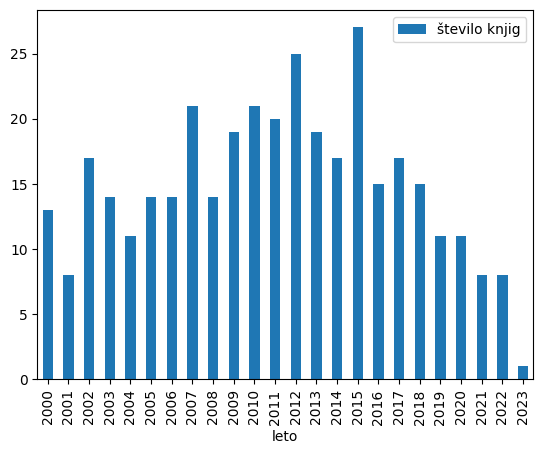

In [120]:
stevilo_knjig_na_leto = knjige.groupby('leto')[['naslov']].count()
stevilo_knjig_na_leto = stevilo_knjig_na_leto.rename(columns={'naslov': 'število knjig'})

display(stevilo_knjig_na_leto)

valid_years = stevilo_knjig_na_leto.index[stevilo_knjig_na_leto.index.astype(str).str.isdigit()]
stevilo_knjig_na_leto = stevilo_knjig_na_leto.loc[valid_years]

stevilo_knjig_na_leto.index = stevilo_knjig_na_leto.index.astype(int)

največ_leto_index = stevilo_knjig_na_leto['število knjig'].idxmax()
največ = stevilo_knjig_na_leto['število knjig'].max()
največ_leto = največ_leto_index  

besedilo = 'Največ knjig, ki imajo oceno nad 4.2, je bilo izdanih v letu {} in sicer {}.'.format(največ_leto, največ)
print(besedilo)

knjige_pred_2000 = stevilo_knjig_na_leto[stevilo_knjig_na_leto.index < 2000]['število knjig'].sum()
knjige_po_2000 = stevilo_knjig_na_leto[stevilo_knjig_na_leto.index >= 2000]['število knjig'].sum()

print(f"Število knjig, izdanih pred letom 2000: {knjige_pred_2000}")
print(f"Število knjig, izdanih po letu 2000: {knjige_po_2000}")

stevilo_knjig_na_leto_graf = stevilo_knjig_na_leto[(stevilo_knjig_na_leto.index >= 2000) & (stevilo_knjig_na_leto.index <= 2023)]

stevilo_knjig_na_leto_graf.plot.bar()

Več knjig z oceno vsaj 4,2 je bilo izdanih pred letom 2000. Razlog tega se morda skriva v dejstvu, da so mnoge knjige prejšnega tisočletja večne klasike in so se obdržale vse do danes, med tem ko je danes preveč knjig in je težje slediti vsemu dogajanju.

Iz grafa lahko razberemo, da je najmanj knjig na tem seznamu iz leta 2023, kar bi lahko nakazovalo, da so podatki za to leto še vedno nepopolni ali da so knjige, izdane v tem obdobju, potrebne več časa za pridobivanje ocen in mnenj. To lahko pomeni, da se trendi v izdaji in ocenjevanju knjig morda spreminjajo, ali pa da se literatura, ki se izdaja v tem času, še ne uveljavlja.

,ocena,število_glasov
leto,,
1010,4.51,5310.00
1258,4.50,3326.00
1455,4.62,90135.00
1580,4.23,20748.00
1609,4.26,113736.00
...,...,...
2020,4.38,325004.27
2021,4.54,121923.50
2022,4.53,152201.38


[]

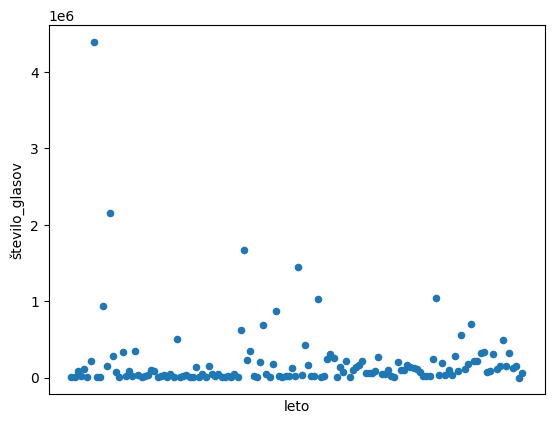

In [133]:
knjige['ocena'] = pd.to_numeric(knjige['ocena'], errors='coerce')
knjige['število_glasov'] = pd.to_numeric(knjige['število_glasov'], errors='coerce')

povprečne_ocene_po_letih = (
    knjige[knjige['leto'] != 'Ni ocene']
    .groupby('leto')[['ocena']]
    .mean()
)

povprečno_število_glasov_po_letih = (
    knjige[knjige['leto'] != 'Ni števila glasov']
    .groupby('leto')[['število_glasov']]
    .mean()
)

povprečni_podatki_ocena_glasovi = povprečne_ocene_po_letih.join(povprečno_število_glasov_po_letih)

display(povprečni_podatki_ocena_glasovi.round(2))

povprečni_podatki_ocena_glasovi.reset_index(inplace=True)
graf = povprečni_podatki_ocena_glasovi.plot.scatter(x='leto', y='število_glasov')

graf.set_xticks([])



Iz grafa je razvidno, da je knjiga z največ glasovi izšla v prejšenm tisočletju in da ime veliko več glasov kot ostale. Prav tako je razvidno da ima večina knjig pod 100000 ocen.

In [136]:
knjige['leto'] = pd.to_numeric(knjige['leto'], errors='coerce')

stare_knjige = knjige[knjige['leto'] < 2000]
nove_knjige = knjige[knjige['leto'] >= 2000]

povprecna_ocena_stare = stare_knjige['ocena'].mean().round(2)
povprecna_ocena_nove = nove_knjige['ocena'].mean().round(2)

print(f"Povprečna ocena knjig, izdanih pred letom 2000, je {povprecna_ocena_stare}")
print(f"Povprečna ocena knjig, izdanih po letu 2000, je {povprecna_ocena_nove}")


Povprečna ocena knjig, izdanih pred letom 2000, je 4.31
Povprečna ocena knjig, izdanih po letu 2000, je 4.33


Povprečna ocena knjig, izdanih pred letom 2000, je 4.31, medtem ko je povprečna ocena knjig, izdanih po letu 2000, nekoliko višja in znaša 4.33. To kaže, da so novejše knjige v povprečju nekoliko bolje ocenjene.

Eden od razlogov za to razliko bi lahko bil, da je pred letom 2000 izšlo veliko več knjig, kar je lahko privedlo do večje raznolikosti ocen. Vse knjige ne dosežejo visokih ocen, zato večje število knjig pomeni tudi večji delež slabših ocen, kar lahko znižuje povprečno oceno. Po letu 2000 pa je morda prišlo do sprememb v izdajanju knjig, kar je privedlo do večje kakovosti ali bolj osredotočenih tematik, kar je posledično izboljšalo povprečne ocene.

### Analiza žanrov

Najprej bom raziskala, koliko različnih žanrov imamo v naši zbirki knjig in kateri od teh žanrov so najbolj zastopani. Pri tem sem pri vsaki knjigi upoštevala le prve štiri žanre, saj bi jih bilo sicer preveč za analizo. Pomembno je tudi omeniti, da nekatere knjige spadajo v več žanrov. Predvidevam, da bo največ knjig spadalo med romane ali fikcijo. Sledi analiza povprečnih ocen za najpogostejše žanre, kot so romanca, zločin in drugi, da ugotovim, kako se ocenjujejo knjige znotraj teh priljubljenih kategorij.

In [95]:
žanri = knjige['žanri'].str.split(', ')

žanri_flat = žanri.explode()

zanri_in_stevilo_knjig = žanri_flat.value_counts().reset_index()

zanri_in_stevilo_knjig.columns = ['žanr', 'število knjig']

popularni_zanri = zanri_in_stevilo_knjig.sort_values(by='število knjig', ascending=False)

display(popularni_zanri)

,žanr,število knjig
0,fiction,455
1,nonfiction,304
2,classics,173
3,fantasy,161
4,historical fiction,153
...,...,...
275,bulgarian literature,1
276,bulgaria,1
277,polyamory,1
278,sexuality,1


Pričakovala sem, da bo največ knjig spadalo med romane ali fikcijo. Vendar pa so rezultati pokazali, da je fikcija sicer najpogosteje zastopan žanr, vendar ji na drugem mestu sledi nefikcije, česar nisem pričakovala. To nakazuje, da bralci cenijo tako umetniške kot informativne vsebine, kar ovrže prvotno domnevo o absolutni prevladi fikcije. Presenetilo me je predvsem to, da na prvih petih mestih ni romance, saj se mi zdi da je to najbolj brano.

žanri
history       4.33
nonfiction    4.33
thriller      4.33
fantasy       4.32
fiction       4.30
romance       4.27
crime         4.25
Name: ocena, dtype: float64

<Axes: xlabel='žanri'>

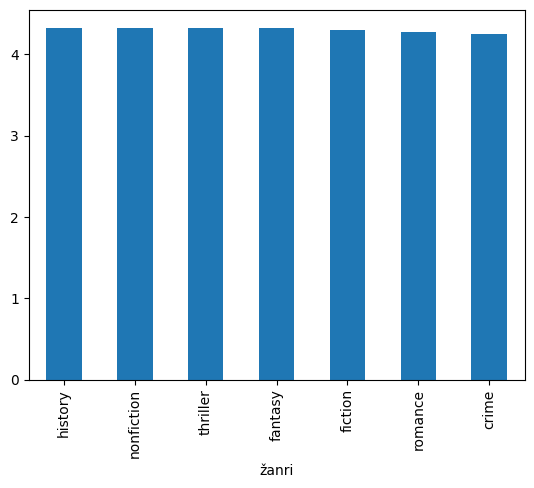

In [137]:
knjige['žanri'] = knjige['žanri'].str.split(', ')
knjige = knjige.explode('žanri')

knjige['žanri'] = knjige['žanri'].str.lower()

določeni_žanri = ['nonfiction', 'crime', 'history', 'romance', 'thriller', 'fantasy', 'fiction']

knjige = knjige[knjige['žanri'].isin(določeni_žanri)]

knjige['ocena'] = knjige['ocena'].replace('Ni ocene', pd.NA)
knjige['ocena'] = pd.to_numeric(knjige['ocena'], errors='coerce')

knjige = knjige.dropna(subset=['ocena'])

najbolje_ocenjeni_zanri = (
    knjige
    .groupby('žanri')['ocena']
    .mean()
    .sort_values(ascending=False)
    .round(2)
)
display(najbolje_ocenjeni_zanri)

najbolje_ocenjeni_zanri.plot.bar()

Najbolj priljubljeni so trilerji, ki imajo povprečno oceno 4,33. Zgodovina in nefikcija jima sledita z enako oceno. Kljub temu, da je fikcija med knjigami najbolj zastopana, pa se pri ocenah glede na žanr, uvršča šele na četrto mesto.

### Analiza avtorjev

Najprej bom preverila, ali obstaja avtor, ki je izdal več kot eno knjigo z oceno vsaj 4,2 in vsaj 1000 ocenami. Potem bom analizirala povprečne ocene knjig prvih desetih avtorjev, da vidim, kako se njihove knjige uvrščajo glede na kakovost. Predpostavljam, da avtor z največjim številom knjig, vseeno ne bo imel najboljše ocene.

,avtor,število knjig,povprečna ocena
564,Shel Silverstein,8,4.35
598,T. Kingfisher,7,4.29
69,Bill Watterson,5,4.68
85,C.S. Lewis,5,4.29
580,Stephen King,5,4.42
29,Amy Harmon,5,4.28
146,Dr. Seuss,4,4.34
534,Robert Munsch,4,4.31
73,Brandon Sanderson,4,4.46
179,Flannery O&#x27;Connor,4,4.26


<Axes: xlabel='avtor'>

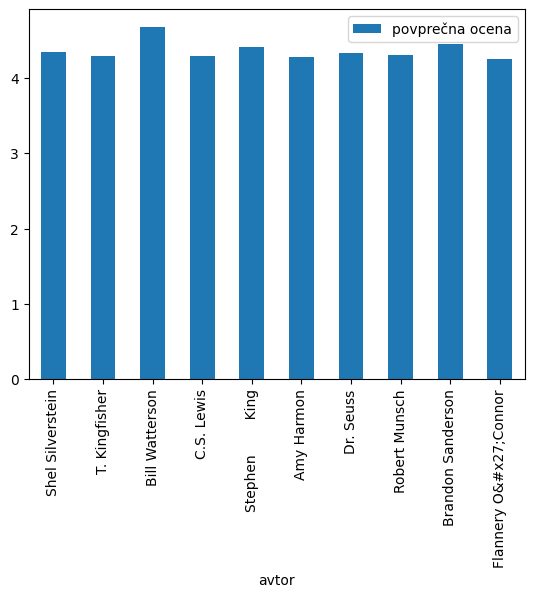

In [97]:
povprecne_ocene = (
    knjige.groupby('avtor')
    .agg({'naslov': 'nunique', 'ocena': 'mean'})
    .reset_index()
    .rename(columns={'naslov': 'število knjig', 'ocena': 'povprečna ocena'})
)

povprecne_ocene['povprečna ocena'] = povprecne_ocene['povprečna ocena'].round(2)

povprecne_ocene = povprecne_ocene.sort_values(by='število knjig', ascending=False)

top_10_avtorjev = povprecne_ocene.head(10)

display(top_10_avtorjev)
top_10_avtorjev.plot.bar(x='avtor', y='povprečna ocena')

Analiza podatkov avtorjev kaže, da so se nekateri avtorji izkazali z več knjigami in solidnimi ocenami. Na primer, Bill Watterson ima le pet knjig, a povprečno oceno 4,68, kar ga postavlja na vrh. Po drugi strani pa avtorji, kot je Stephen King, ki ima pet knjig, dosega povprečno oceno 4,42.

Moja predpostavka, da avtor z največjim številom knjig ne bo imel nujno najboljše ocene, se potrjuje. Na primer, Shel Silverstein je izdal osem knjig z povprečno oceno 4,35, kar ni med najboljšimi rezultati. To kaže, da kvaliteta knjig ni nujno odvisna od njihovega števila. Tako lahko sklepamo, da je za uspeh avtorja ključno ustvarjanje kakovostne vsebine, ne zgolj število izdanih knjig.

### Analiza števila strani

Najprej bom analizirala število strani knjig, da ugotovim, koliko strani ima vsaka knjiga. To mi bo omogočilo boljše razumevanje dolžine knjig in morebitnega vpliva na ocene ter priljubljenost. Potem bom raziskala, ali obstaja kakšna povezava med številom strani (vzela bom knjige z manj kot 1000 stranmi) in ocenami knjig. Menim, da bojo knjige z več kot 500 stranmi, ocenjene nekoliko slabše kot krajše.

,naslov,število_strani
0,Worm,6680
1,Worm,6680
2,In Search of Lost Time,4211
3,Harry Potter and the Methods of Rationality,2184
4,Harry Potter and the Methods of Rationality,2184
...,...,...
1095,Pannkakstårtan,24
1096,Curious George and the Rocket,20
1097,The Rose Code,17
1098,American Dirt,17


[]

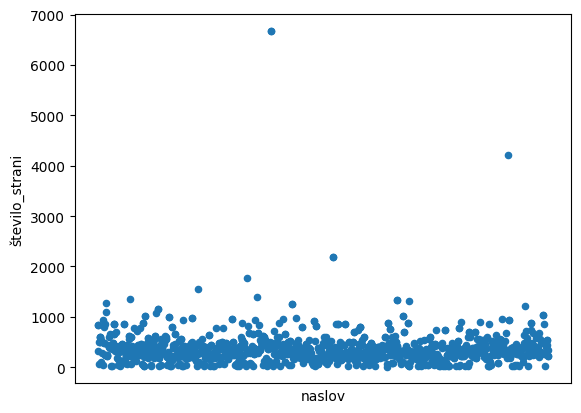

In [98]:
knjige_s_stranmi = knjige[knjige['število_strani'] != "Ni števila strani"].copy()

knjige_s_stranmi.loc[:, 'število_strani'] = pd.to_numeric(knjige_s_stranmi['število_strani'], errors='coerce')

urejene_knjige = knjige_s_stranmi[['naslov', 'število_strani']].sort_values(by='število_strani', ascending=False)

display(urejene_knjige.reset_index(drop=True))

ax = knjige_s_stranmi.plot.scatter(x='naslov', y='število_strani')
ax.set_xticks([]) 

Knjiga z največjim številom strani je Worm z 6680 stranmi, najkrajša knjiga z samo 11 strani je What My Bones Know: A Memoir of Healing from Complex Trauma. 
Med knjige, ki imajo vsaj 1000 glaosv in oceno vsaj 4,2 je največ takšnih, ki imajo manj kot 1000 strani, nekaj pa je tudi takšnih, ki imajo več kot 1000 strani. 
Sedaj pa bom z grafom prikazala še samo knjige z manj kot 1000 stranmi.

[]

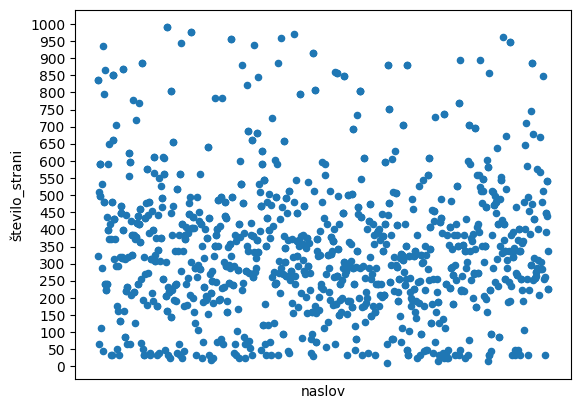

In [99]:
strani = knjige[knjige['število_strani'] != "Ni števila strani"].copy()
strani['število_strani'] = pd.to_numeric(strani['število_strani'], errors='coerce')

manj_kot_1000 = strani[strani['število_strani'] < 1000]

graf_manj_kot_1000 = manj_kot_1000.plot.scatter(x='naslov', y='število_strani')
graf_manj_kot_1000.set_yticks(range(0, 1001, 50))
graf_manj_kot_1000.set_xticks([]) 

Iz grafa je razvidno, da ima največ knjig med 11 in 500 strani.

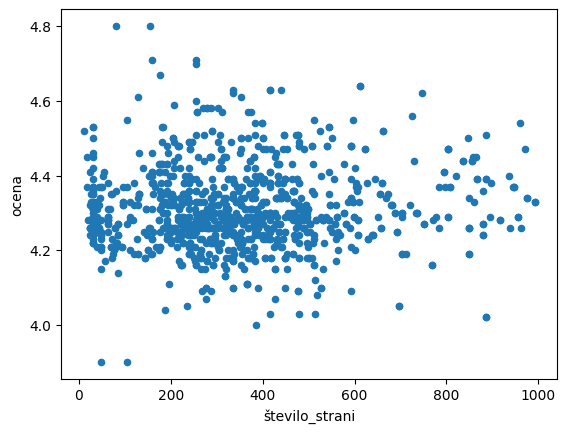

In [151]:
manj_kot_1000 = knjige[knjige['število_strani'] < 1000]

ax = manj_kot_1000.plot.scatter(x='število_strani', y='ocena')


Glede na mojo predpostavko, je iz grafa vidno nasprotno, da so knjige z manj kot 500 stranmi hkrati slabše in boljše ocenjene. Knjige z več kot 500 stranmi pa so ocenjene povprečno, glede na vse.